In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

* **Loading the csv file**

In [3]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

* ## **Simple Exploration of the data**

In [4]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [5]:
df.values.shape

(303, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* ## Data Visualization

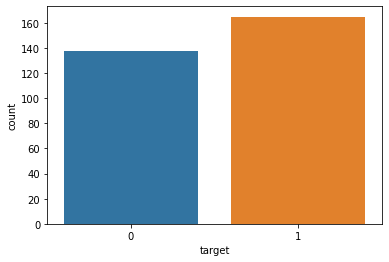

In [10]:
sns.countplot(x = 'target', data = df )

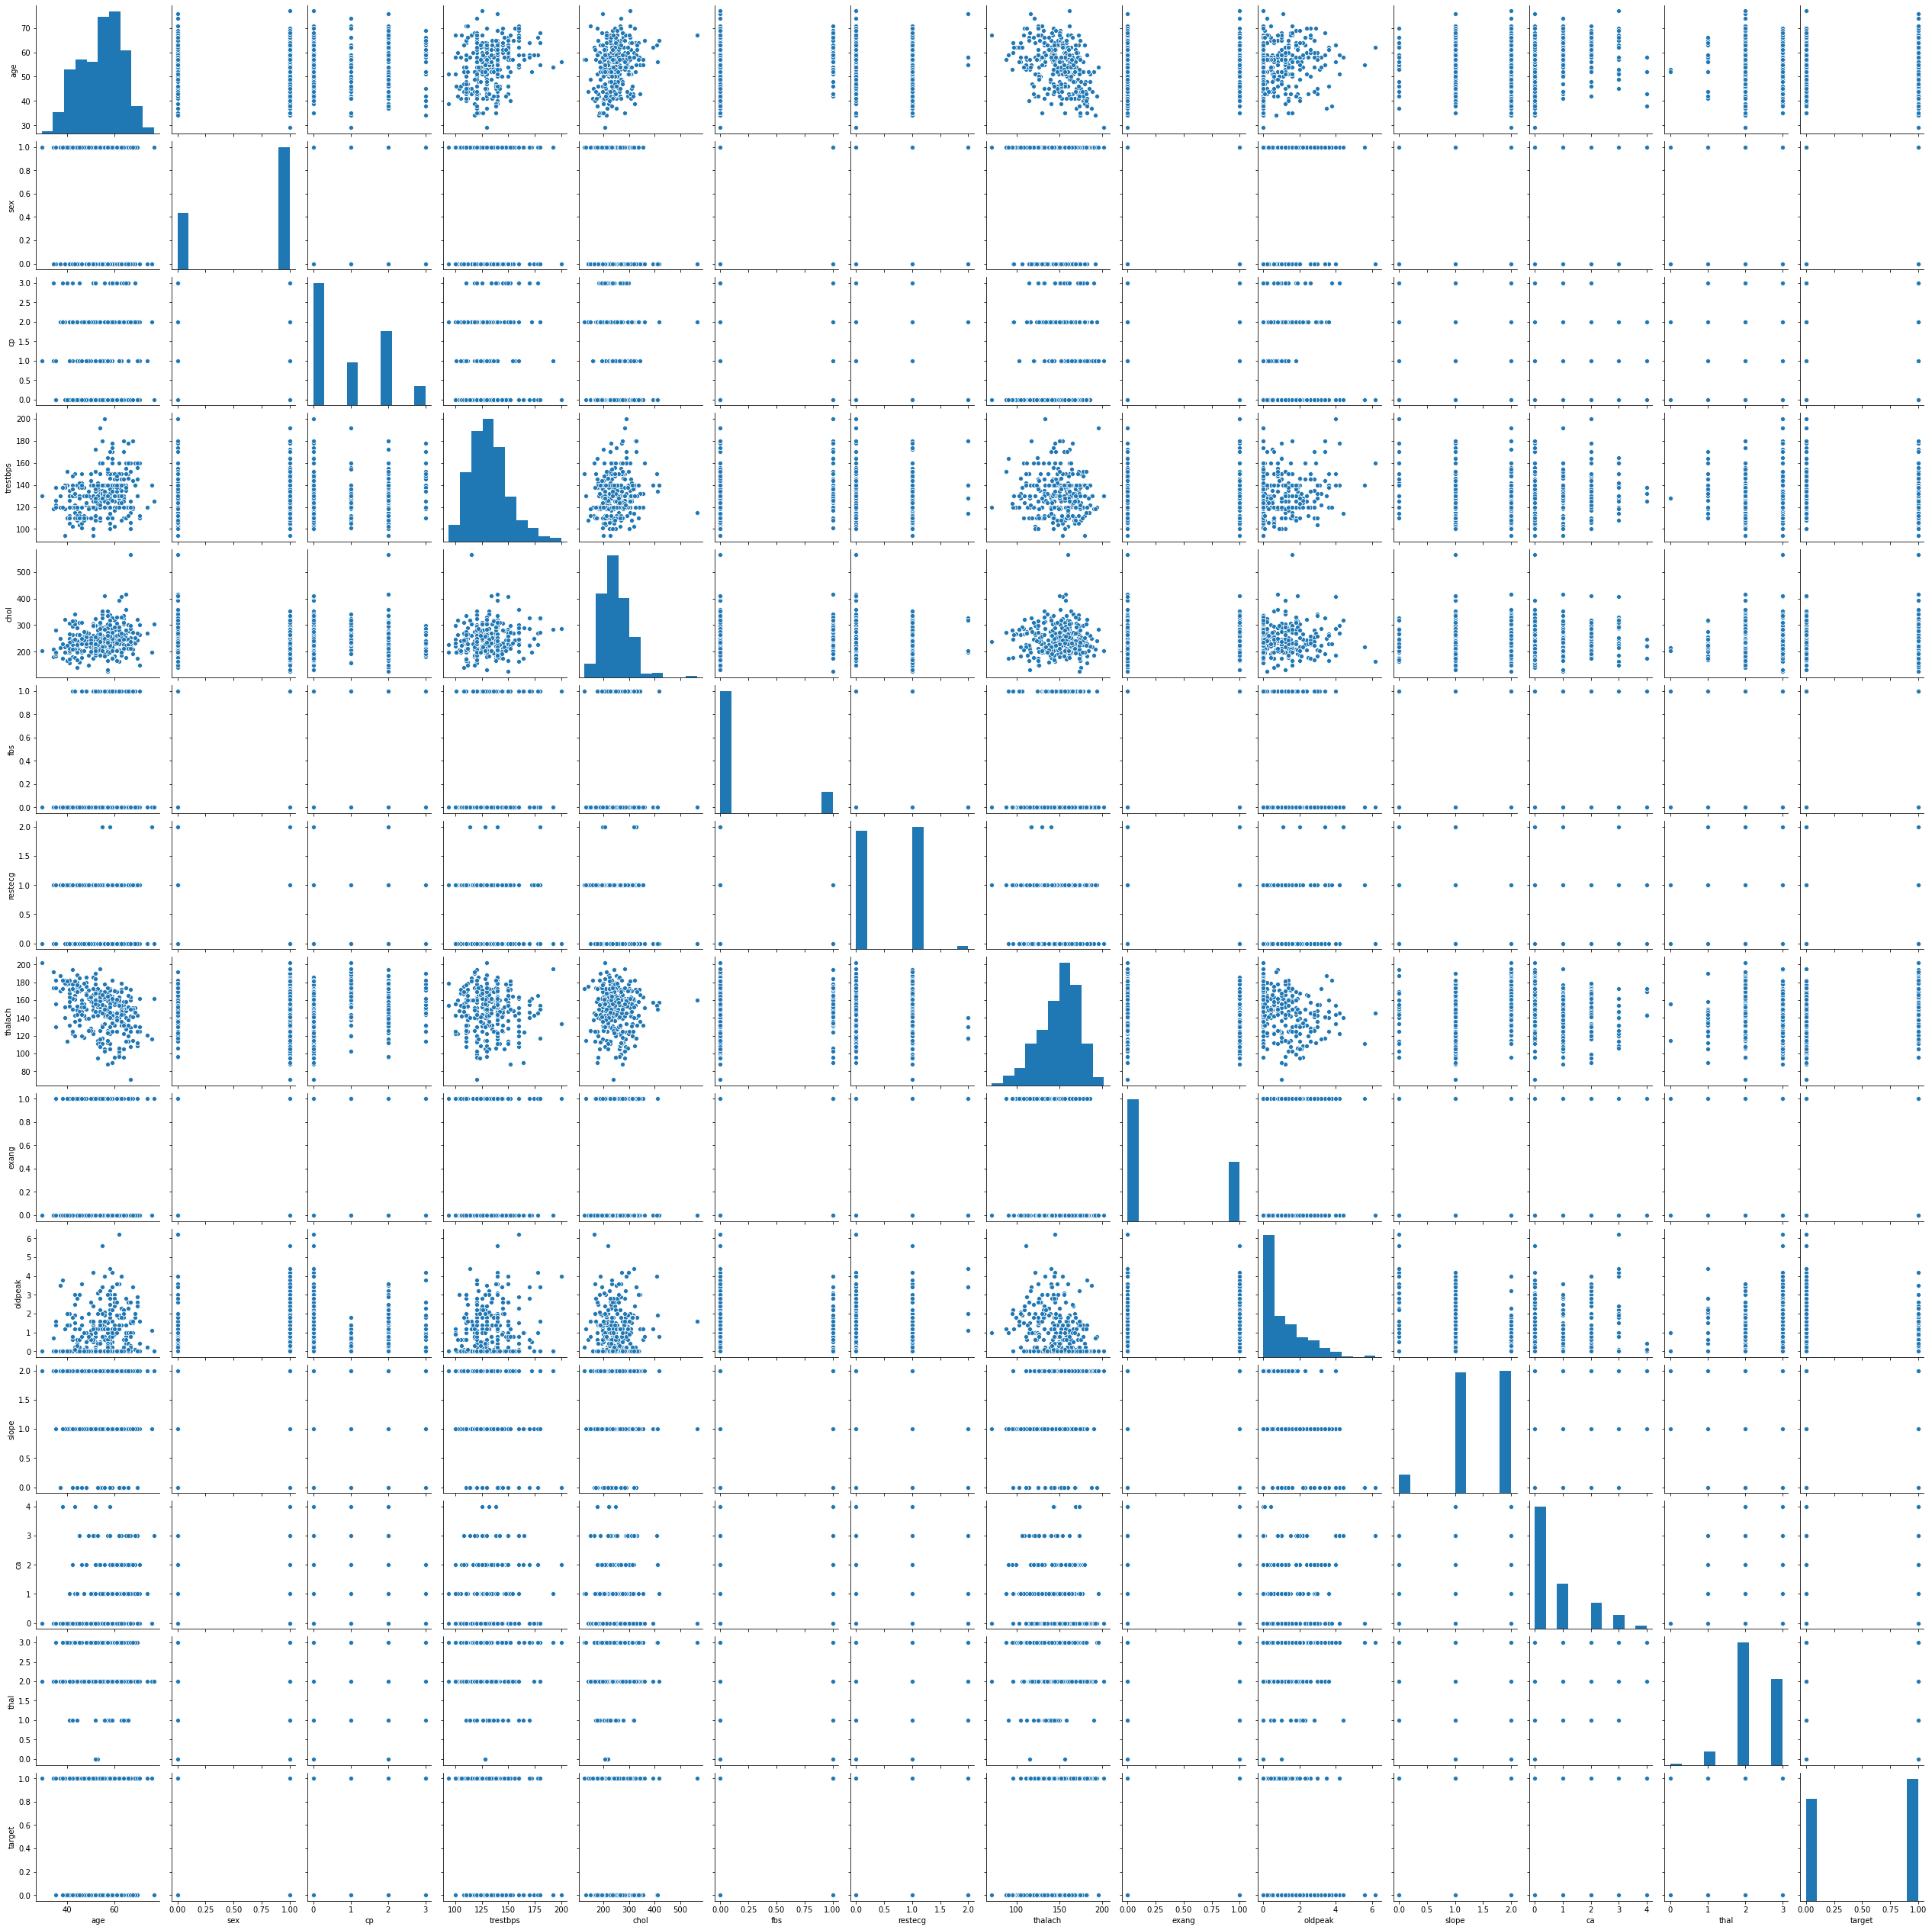

In [11]:
sns.pairplot(df)

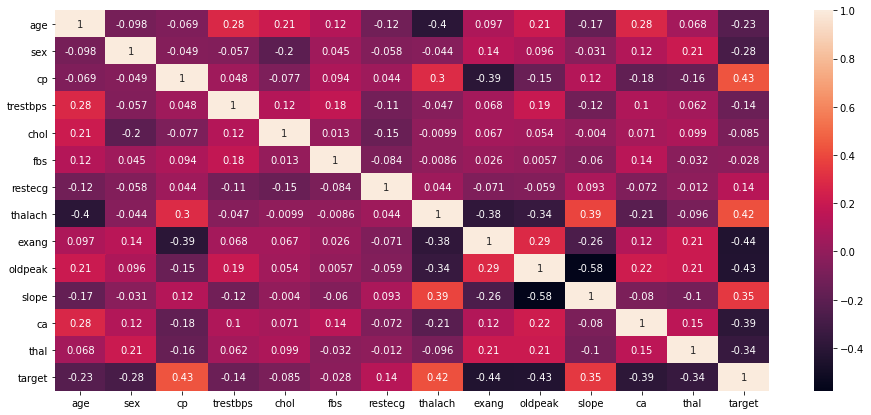

In [12]:
plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), annot = True)

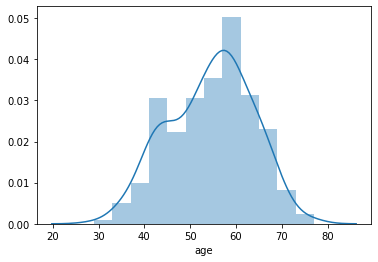

In [13]:
sns.distplot(df['age'])

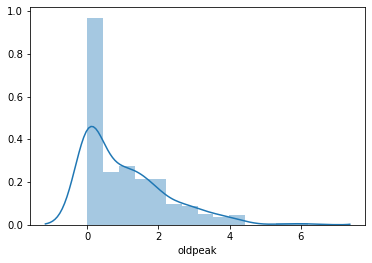

In [14]:
sns.distplot(df['oldpeak'])

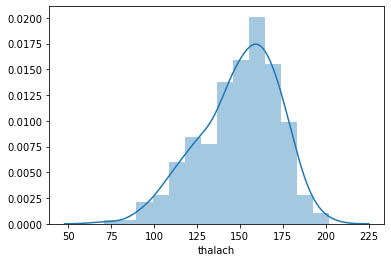

In [15]:
sns.distplot(df['thalach'])

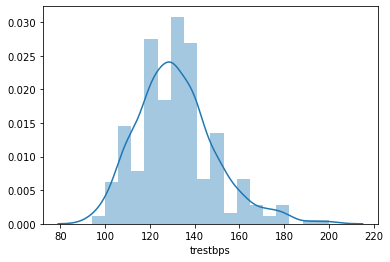

In [16]:
sns.distplot(df['trestbps'])

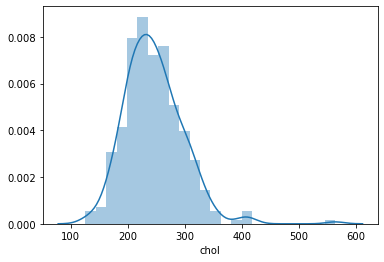

In [17]:
sns.distplot(df['chol'])

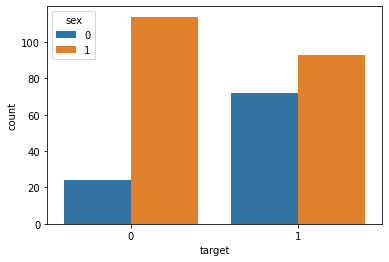

In [18]:
sns.countplot(x = 'target',data = df, hue = 'sex',)

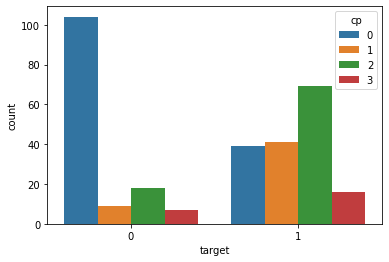

In [19]:
sns.countplot(x = 'target', data = df, hue = "cp")

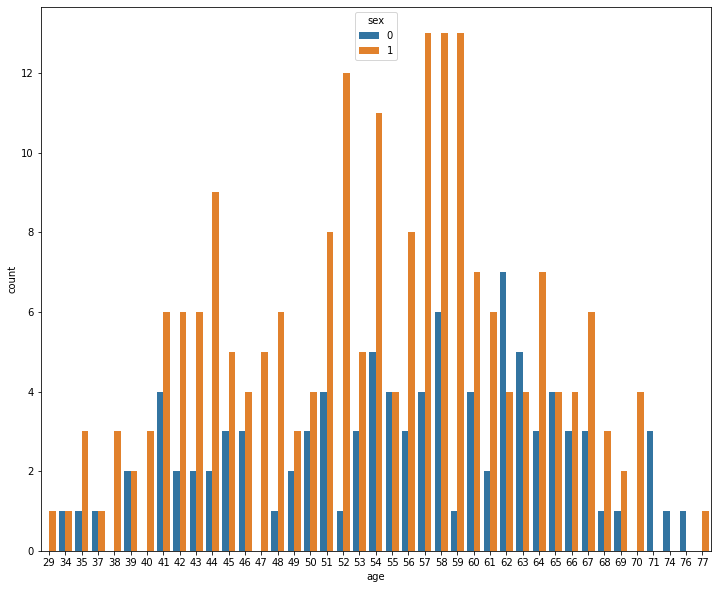

In [20]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'age', data = df, hue = 'sex')

In [21]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

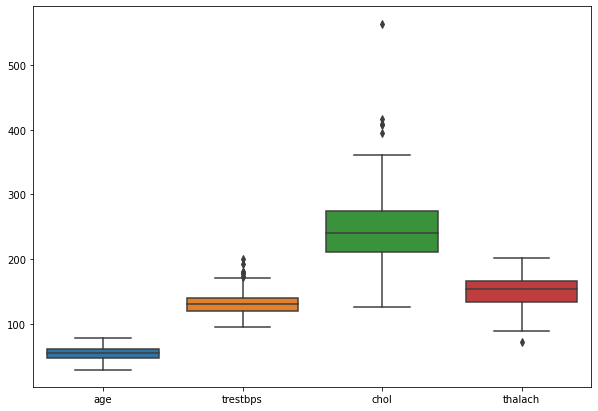

In [22]:
plt.figure(figsize = (10,7))
sns.boxplot(data = df[['age', 'trestbps','chol','thalach']])

# **Outlier treatment**

In [23]:
for i in df[['age','trestbps','chol','thalach']]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    iqr = Q3-Q1
    Upper_limit = Q3+3*iqr
    df = df[df[i]< Upper_limit]
    print(df)     

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

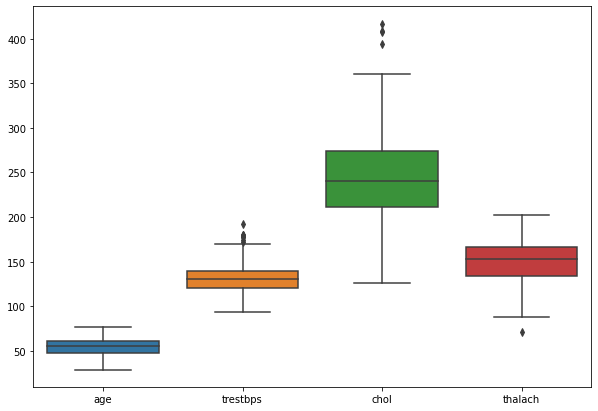

In [24]:
plt.figure(figsize = (10,7))
sns.boxplot(data = df[['age', 'trestbps','chol','thalach']])

# Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('target', axis = 1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# --Preprocessing--

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
print("X_train min = {} and max = {}".format(X_train.min(),X_train.max()))

X_train min = 0.0 and max = 1.0000000000000002


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)


Importing metrics module from sklearn for **classification_report, confusion matrix, accuracy score**

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



In [33]:
print(confusion_matrix(y_test,predictions))

[[32 12]
 [ 3 44]]


In [34]:
print("Logistic regression accuracy is {}".format(accuracy_score(y_test,predictions)))

Logistic regression accuracy is 0.8351648351648352


# K nearest neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
Kneighbor = KNeighborsClassifier(n_neighbors=6)
Kneighbor.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [36]:
predict_knn = Kneighbor.predict(X_test)

In [37]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.89      0.85      0.87        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [38]:
print(confusion_matrix(y_test,predict_knn))

[[39  5]
 [ 7 40]]


In [39]:
print('Knn accuracy is {}'.format(accuracy_score(y_test,predict_knn)))

Knn accuracy is 0.8681318681318682


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
predict_tree = tree.predict(X_test)

In [42]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.78      0.83      0.80        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [43]:
print(confusion_matrix(y_test,predict_tree))

[[33 11]
 [ 8 39]]


In [44]:
print('Decision tree accuracy is {}'.format(accuracy_score(y_test,predict_tree)))

Decision tree accuracy is 0.7912087912087912


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 150)
random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [46]:
predict_random = random.predict(X_test)

In [47]:
print(classification_report(y_test,predict_random))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        44
           1       0.81      0.81      0.81        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [48]:
print(confusion_matrix(y_test,predict_random))

[[35  9]
 [ 9 38]]


In [49]:
print('Random forest accuracy is {}'.format(accuracy_score(y_test,predict_random)))

Random forest accuracy is 0.8021978021978022


# Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,y_train)

SVC()

In [51]:
predict_svm = model_svm.predict(X_test)

In [52]:
print(classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [53]:
print(confusion_matrix(y_test,predict_svm))

[[35  9]
 [ 6 41]]


In [54]:
print("SVM accuracy is {}".format(accuracy_score(y_test,predict_svm)))

SVM accuracy is 0.8351648351648352


# Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
model_ai = Sequential()

model_ai.add(Dense(13,activation = 'relu'))
model_ai.add(Dropout(0.2))
model_ai.add(Dense(9,activation = 'relu'))
model_ai.add(Dropout(0.2))

#Binary classification
model_ai.add(Dense(1,activation = 'sigmoid'))

model_ai.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [57]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 30)

In [58]:
model_ai.fit(x = X_train,y = y_train, epochs = 600, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
7/7 [==============================] - 0s 21ms/step - loss: 0.6858 - val_loss: 0.6894
Epoch 2/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6879 - val_loss: 0.6811
Epoch 3/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6829 - val_loss: 0.6731
Epoch 4/600
7/7 [==============================] - 0s 4ms/step - loss: 0.6642 - val_loss: 0.6651
Epoch 5/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6676 - val_loss: 0.6566
Epoch 6/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6656 - val_loss: 0.6479
Epoch 7/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6447 - val_loss: 0.6386
Epoch 8/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6458 - val_loss: 0.6292
Epoch 9/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6639 - val_loss: 0.6205
Epoch 10/600
7/7 [==============================] - 0s 3ms/step - loss: 0.6283 - val_loss: 0.6120
Epoch 11/600
7/7 [==========

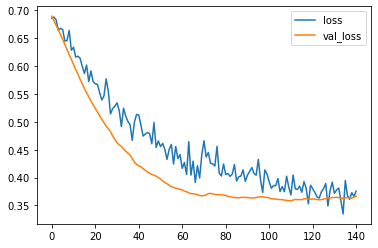

In [59]:
losses = pd.DataFrame(model_ai.history.history)
losses.plot()

In [60]:
prediction_ai = model_ai.predict_classes(X_test)

In [61]:
print(classification_report(y_test,prediction_ai))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.84      0.81      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [62]:
print(confusion_matrix(y_test,prediction_ai))

[[37  7]
 [ 9 38]]


In [63]:
print("Neural Network accuracy is {}".format(accuracy_score(y_test,prediction_ai)))

Neural Network accuracy is 0.8241758241758241


## Thankyou